<a href="https://colab.research.google.com/github/weltonlopesdev/Arvore-de-decis-o-machine-learn-utilizando-python/blob/main/Arvore_de_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Arvores de Decisao em I.A (machine learning)**



Este algoritimo se baseia em (true & false) ou separação binária.

O objetivo é criar regras básicas (if-then rules).

Apartir das regras é criado o modelo que pode ser entropy u gini

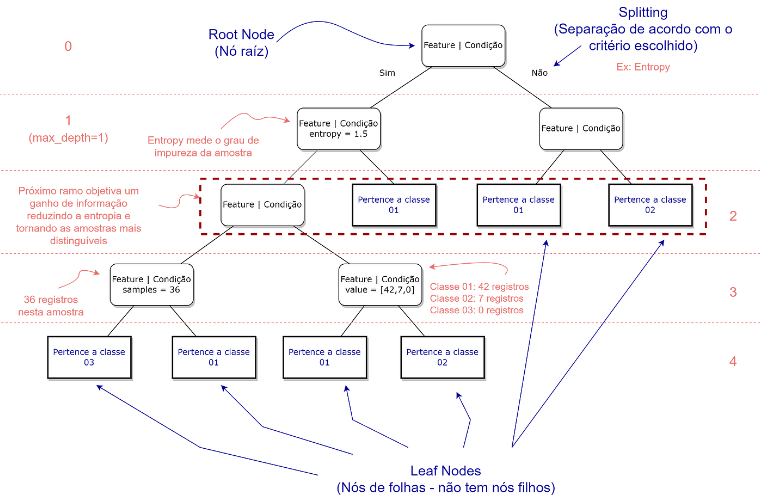

In [3]:
#importando as bibliotecas que serão utilizadas
from sklearn.datasets import load_wine
import pandas as pd
import graphviz 
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_graphviz, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
# importando os dados do toy dataset wine
x,y = load_wine(return_X_y =True, as_frame=True)

# separando em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [5]:
#instanciando a árvore de decisão
tree = DecisionTreeClassifier(random_state=42) # utilizando uma decision tree com os parâmetros default

# treinando a árvore de decisão nos dados
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

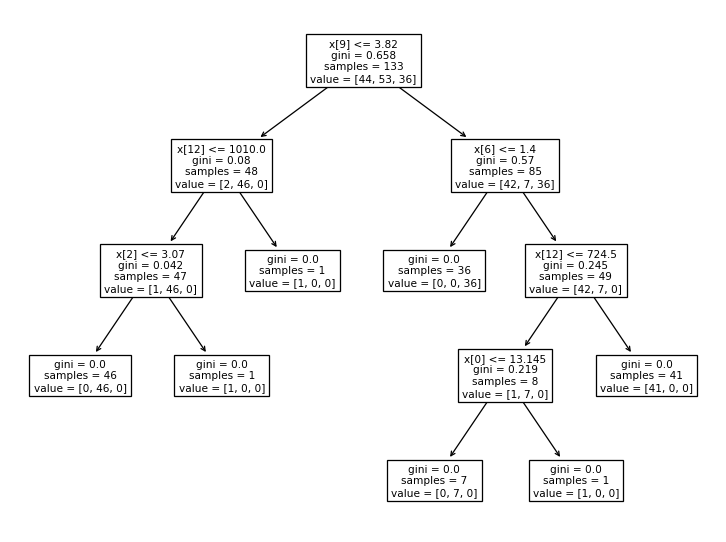

In [6]:
# criando o fig e o axes 
fig, ax = plt.subplots(figsize=(8,6),dpi=92)

#criando o plot
plot_tree(tree,ax=ax)

#plotando o gráfico
plt.tight_layout();

In [7]:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

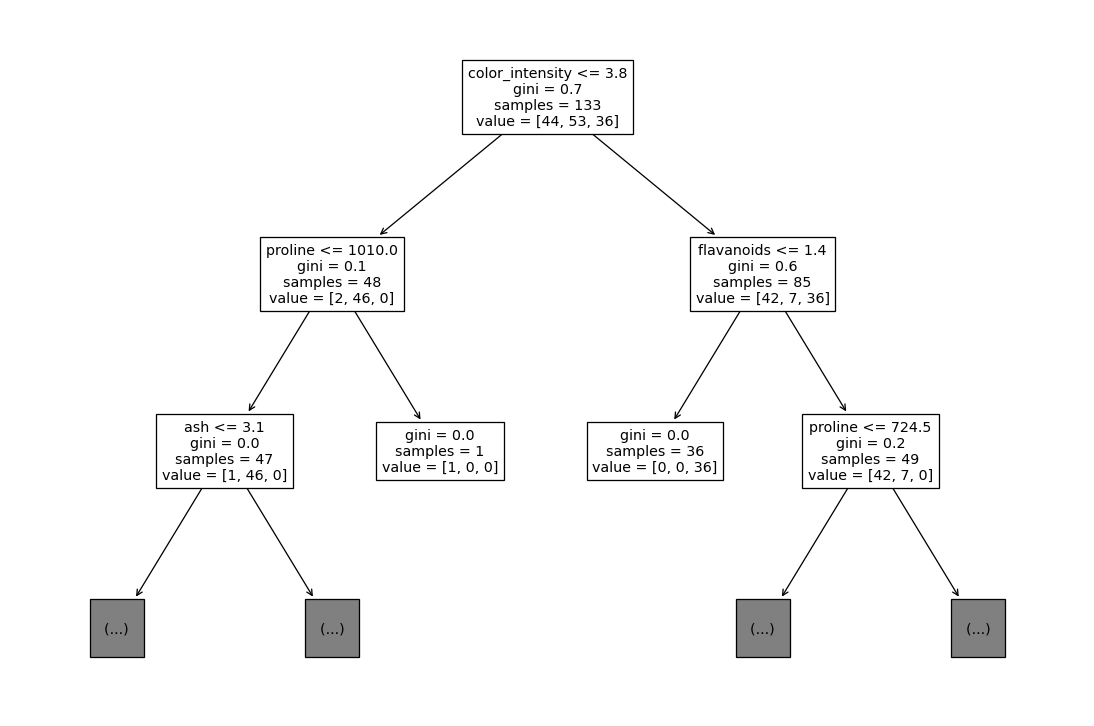

In [8]:
# criando o fig e o axes 
fig, ax = plt.subplots(figsize=(12,8),dpi=92)

#criando o plot
plot_tree(tree, # a decision tree que será plotada
          feature_names = x_train.columns, # trará o nome das features utilizadas na primeira linha de cada nó
          ax=ax, # plotamos no axes criado do matplotlib
          precision=1, # precisão dos valores numéricos
          max_depth=2, #  escolhemos a profundidade da árvore
          # proportion = True # retorna a proporção dos valores das amostras
          #fontsize = 20 # mudar o tamanho da fonte
        )

#plotando o gráfico
plt.tight_layout();